# compare OnBeam BNB data to MC-BNB/DATA cosmic overlay 
This is done by fixing two factors:
1. area-normalizing the overlay to match the OnBeam data
2. reweighting the cosmic in the overlay, to match the OnBeam in the preselection stage

and then studying what happens to the OnBeam/overlay comparison after all cuts

In [12]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

In [13]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/'

In [14]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [15]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

38163 pairs from On-Beam, 24323 in Fiducial Volume
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%
95259 cosmic pairs and 49707 mu-p pairs in overlay


In [16]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt no delta phi'               
               ,'Pt & delta phi'
              ]


cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,'$p_t$ imbalance'
             ,r'$\Delta \phi $ \&  $p_{t}$'
            ]

reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)
Chi2Proton,63.1%,70.7%,68.7%,37.1%,Chi2Proton,63.1% (31389),19.3% (8021),5.2% (5001),68.7% (16481)
MatchedFlash,51.6%,78.1%,56.3%,41.2%,MatchedFlash,51.6% (25634),13.2% (5491),1.8% (1688),56.3% (13510)
length,47.2%,83.5%,52.5%,44.8%,length,47.2% (23459),7.9% (3281),1.4% (1369),52.5% (12600)
non-collinearity,43.1%,87.4%,49.7%,48.7%,non-collinearity,43.1% (21412),5.8% (2409),0.7% (673),49.7% (11926)
vertex activity,31.0%,89.1%,44.2%,61.5%,vertex activity,31.0% (15391),3.7% (1538),0.4% (346),44.2% (10616)
delta phi,20.6%,95.3%,33.7%,75.2%,delta phi,20.6% (10241),0.9% (382),0.1% (118),33.7% (8080)
Pt no delta phi,23.3%,92.4%,36.0%,69.0%,Pt no delta phi,23.3% (11582),1.8% (767),0.2% (185),36.0% (8646)
Pt & delta phi,18.2%,96.3%,30.4%,77.8%,Pt & delta phi,18.2% (9035),0.7% (270),0.1% (79),30.4% (7304)


In [17]:
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to data


## 2.II Changing the cosmic to beam ratio in overlay

### collinearity as a test observable for cosmic rescaling

In [18]:
var='theta_12'
x_label=r'$\theta_{1,2}$ angle between the two tracks [deg.]'
bins=np.linspace(0,180,81)

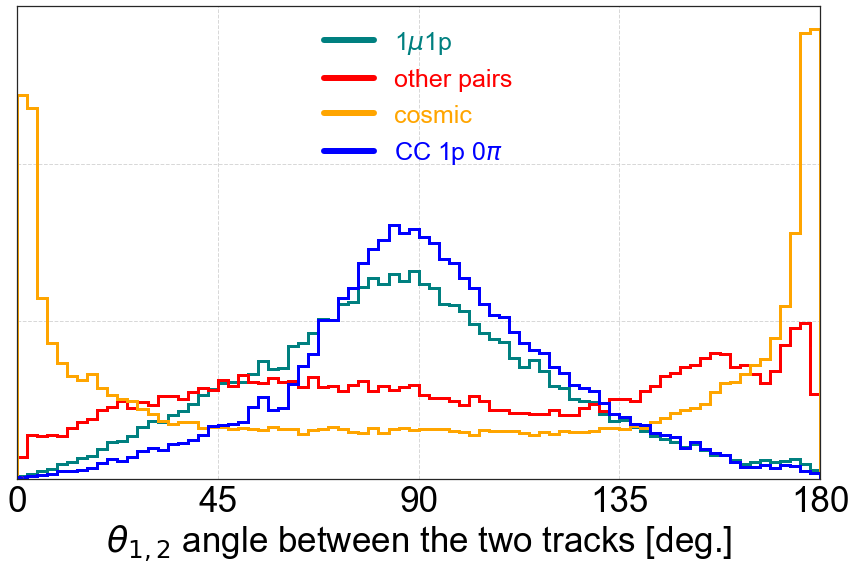

In [19]:
ax=plot_feature_pairs(var=var,x_label=x_label,reduced_samples=reducedOverlay['no cut']
                              ,bins=bins,do_add_legend=True
                              ,figsize=(12,8),fontsize=35,legend_loc='upper center',legend_fontsize=25)
plt.savefig(figures_path+'theta_12_overlay_no_cut.pdf')

# overlay subsamples-scaling

In [20]:
overlay_scalings = dict()
overlay_scalings['N(On) scaling'] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                                                              
                                                        , f_Cosmic=None  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                        , OverlaySubsamples=reducedOverlay['no cut'])

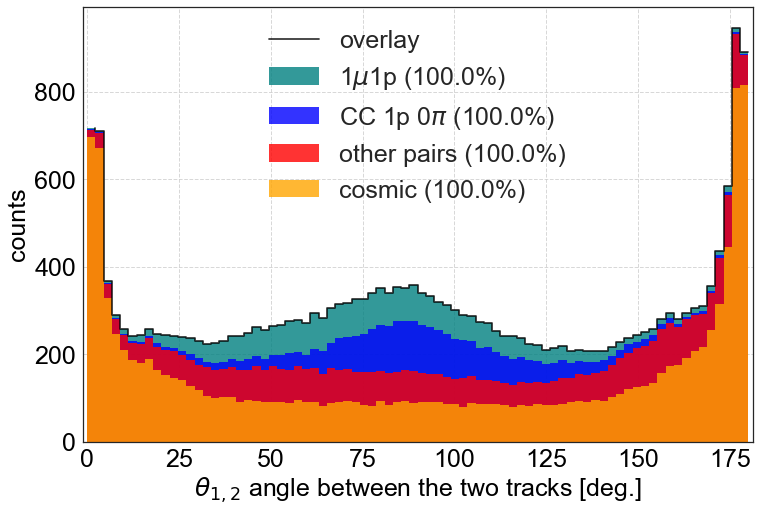

In [21]:
fig,ax=plt.subplots(figsize=(12,8))
plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='no cut'
                       , overlay_scaling=overlay_scalings['N(On) scaling']
                       , ax=ax, var=var, x_label=x_label,y_label='counts', bins=bins 
                       , fontsize=25                       
                       , do_add_legend=True, stackColor='black',stackLabel='overlay'
                      );
plt.savefig(figures_path+'theta_12_overlay_stacked.pdf')

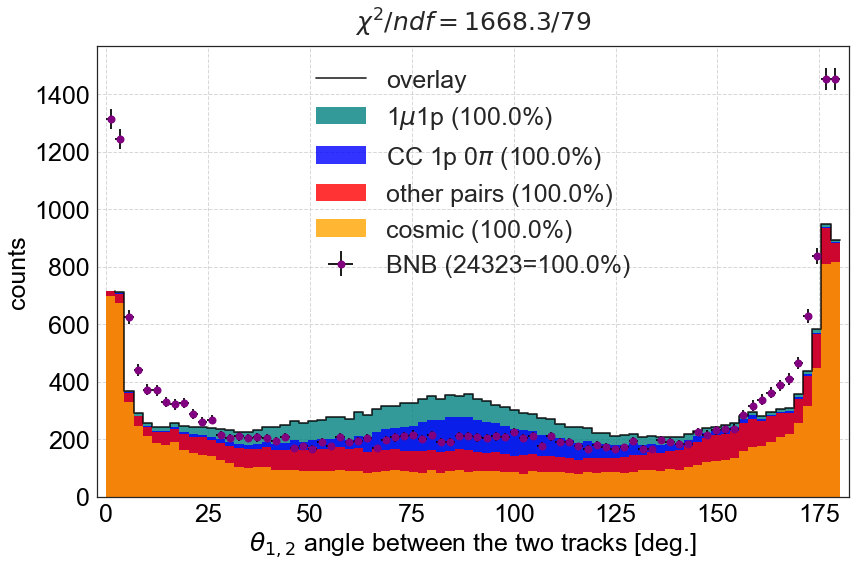

In [22]:
fig,ax=plt.subplots(figsize=(12,8))
h_stack,_=plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='no cut'
                       , overlay_scaling=overlay_scalings['N(On) scaling']
                       , ax=ax, var=var, x_label=x_label,y_label='counts', bins=bins 
                       , fontsize=25                       
                       , stackColor='black',stackLabel='overlay'
                      );
_,h_OnBeam = plot_OnBeam(OnBeamSample=reducedOnBeam['no cut'],OnBeamFV=reducedOnBeam['no cut'],markersize=8
                                 ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
ax.legend(fontsize=25)
chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                     , h1=h_OnBeam , h2=h_stack
                                     , h1err=np.sqrt(h_OnBeam), h2err=np.sqrt(h_stack)
                                     , debug=0 )
chi2_txt = r'$\chi^2/ndf=%.1f/%d$'%(chi2,ndf)
ax.set_title(chi2_txt,y=1.02,fontsize=25)
plt.tight_layout()
plt.savefig(figures_path+'theta_12_overlay_stacked_with_BeamOn.pdf')

## optimize the matching using $\chi^2$ test

In [23]:
f_cosmic_array = linspace(0,1,100)
chi2_array = []

for f_Cosmic in f_cosmic_array:
    x = reducedOnBeam['no cut'][var]
    h_OnBeam,edges = np.histogram( x , bins=bins )

    overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic , OverlaySubsamples=reducedOverlay['no cut'])
    overlay_scaling = overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]
    h = dict()
    for i_pair_type,pair_type in enumerate(pair_types):
        sample = reducedOverlay['no cut'][pair_type]
        x = sample[var]; x = x[x<1e5];
        h[pair_type],edges = np.histogram(x,bins=bins)
        h[pair_type+' scaled'] = overlay_scaling[pair_type]*h[pair_type] if overlay_scaling else h[pair_type]
    # -- - - - --------- - - -- ---- -  - --- -- -- -- --
    h_stack = h['cosmic scaled']+h['other pairs scaled']+h['1mu-1p scaled']
    chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                     , h1=h_OnBeam , h2=h_stack
                                     , h1err=np.sqrt(h_OnBeam), h2err=np.sqrt(h_stack)
                                     , debug=0 )
    chi2_array.append(chi2)    
    
chi2_array = np.array(chi2_array)    
print 'done.'

done.


f_min: 0.909090909091


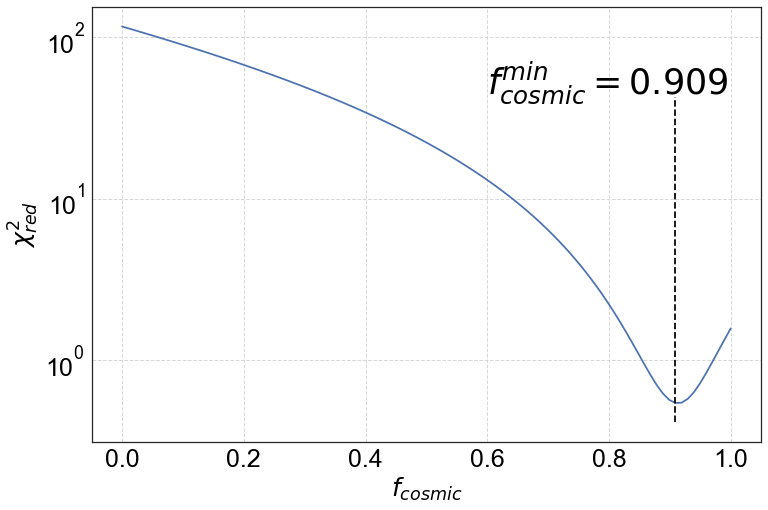

In [24]:
fig,ax=plt.subplots(figsize=(12,8))
plt.plot(f_cosmic_array,chi2_array/ndf)
set_axes(ax,r'$f_{cosmic}$',r'$\chi^2_{red}$',do_add_grid='True')
ax.set_yscale('log')

# best point
i_min = np.argmin(chi2_array)
f_min = f_cosmic_array[i_min]
print 'f_min:',f_min
plt.plot([f_min,f_min],[np.min(ax.get_ylim()),chi2_array[i_min]],'--',color='black')
plt.text(0.6,1.05*chi2_array[i_min],r'$f _{cosmic}^{min} = %.3f$'%f_min,fontsize=35 ,color='black') 
plt.savefig(figures_path+'f_cosmic_vs_chi2.pdf')

# and after choosing the optimal $f_{cosmic}$

In [25]:
f_Cosmic=0.909
overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                                                        
                                                                                    , f_Cosmic=f_Cosmic  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                                                    , OverlaySubsamples=reducedOverlay['no cut'])
print 'overlay scalings';pp.pprint(overlay_scalings)

overlay scalings
{   'N(On) scaling': {   '1mu-1p': 0.13042872080864412,
                         'CC 1p 0pi': 0.13042872080864415,
                         'N(Ovelay)/N(On)': 7.667022982362373,
                         'cosmic': 0.13042872080864412,
                         'other pairs': 0.13042872080864415},
    'N(On) scaling and f(cosmic)=0.00': {   '1mu-1p': 0.26662355030364149,
                                            'CC 1p 0pi': 0.26662355030364149,
                                            'N(Ovelay)/N(On)': 7.667022982362373,
                                            'cosmic': 0.0,
                                            'other pairs': 0.26662355030364154},
    'N(On) scaling and f(cosmic)=0.01': {   '1mu-1p': 0.26393038312885725,
                                            'CC 1p 0pi': 0.26393038312885725,
                                            'N(Ovelay)/N(On)': 7.667022982362373,
                                            'cosmic': 0.0025791459986654144,


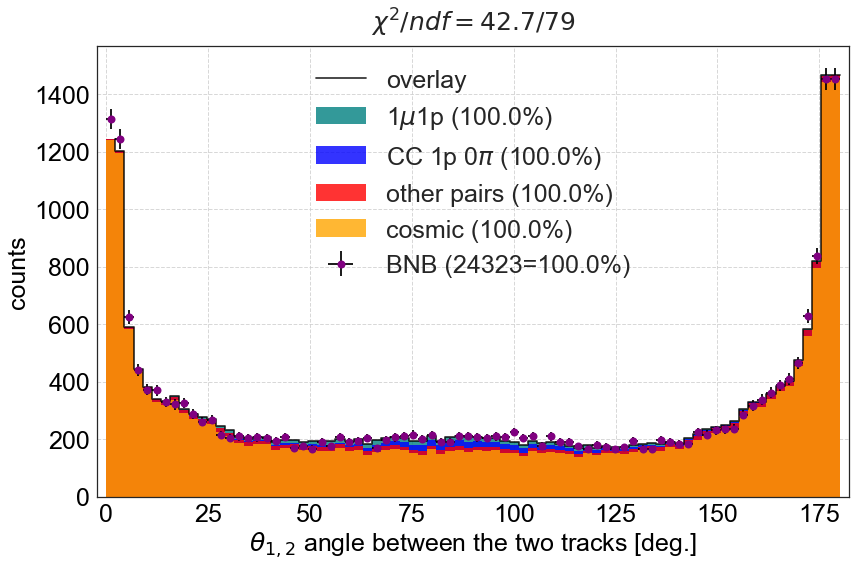

In [26]:
fig,ax=plt.subplots(figsize=(12,8))
h_stack,_=plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='no cut'
                       , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]
                       , ax=ax, var=var, x_label=x_label,y_label='counts', bins=bins 
                       , fontsize=25                       
                       , stackColor='black',stackLabel='overlay'
                      );
_,h_OnBeam = plot_OnBeam(OnBeamSample=reducedOnBeam['no cut'],OnBeamFV=reducedOnBeam['no cut'],markersize=8
                                 ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                     , h1=h_OnBeam , h2=h_stack
                                     , h1err=np.sqrt(h_OnBeam), h2err=np.sqrt(h_stack)
                                     , debug=0 )
chi2_txt = r'$\chi^2/ndf=%.1f/%d$'%(chi2,ndf)
ax.set_title(chi2_txt,y=1.02,fontsize=25)
ax.legend(fontsize=25)
plt.tight_layout()
plt.savefig(figures_path+'theta_12_overlay_cosmicRescaled_with_BeamOn.pdf')

# now lets plot all observables before and after the cuts

In [27]:
df_chi2_ndf = pd.DataFrame(columns={'var','$\chi^2$','ndf'})

## $\chi^2_{proton-hypothesis}$

In [28]:
cuts_order  = ['no cut'
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 18728 ,sum of h_stack: 18451.5773314
detection + kinematical cuts : sum of h_OnBeam: 496 ,sum of h_stack: 342.882416569


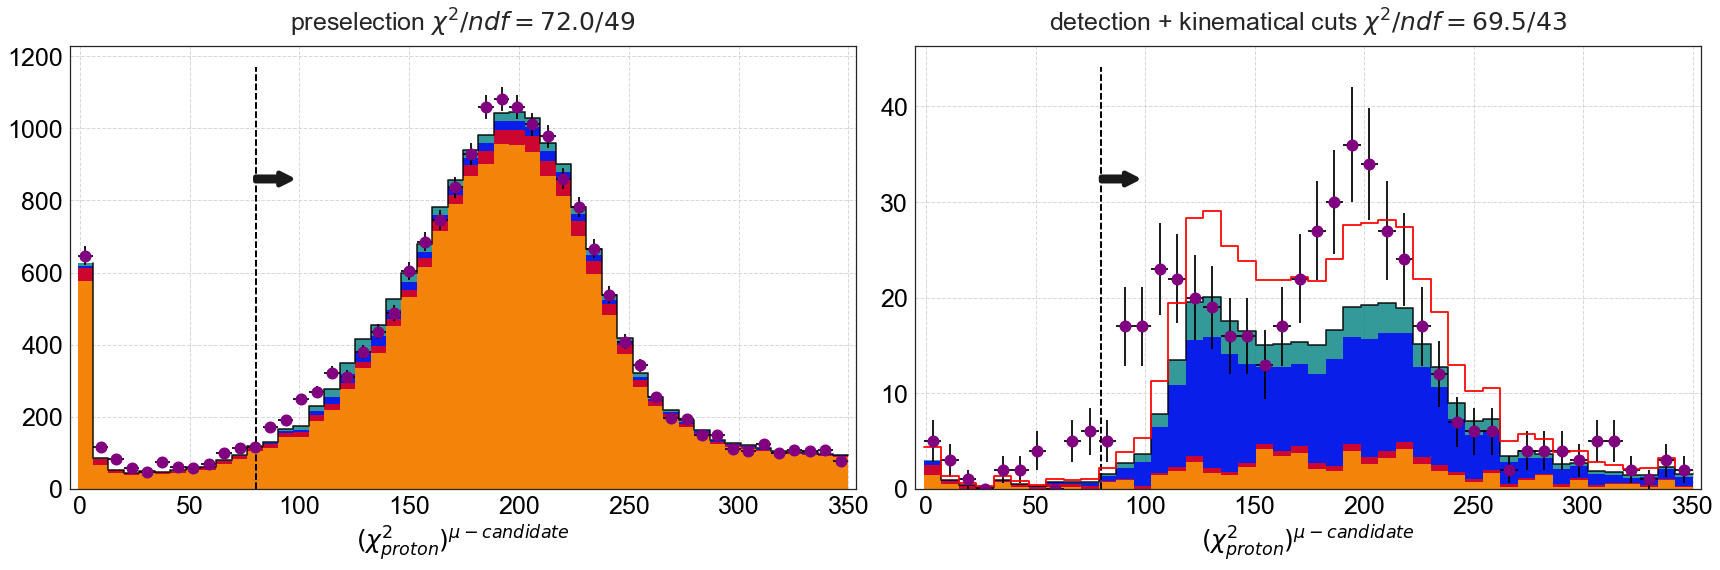

In [29]:
var='pidcali_Chi2ProtonYplane_muCandidate'
_,_,chi2,ndf=plot_before_after_cuts(var=var
                       ,x_label=r'$(\chi^2_{proton})^{\mu-candidate}$',y_label=''
                       ,bins_before_cuts=linspace(-1,350,51)
                       ,last_cut_name='Pt & delta phi'
                       ,bins_after_cuts=linspace(-1,350,45)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                       ,chi2_xrange=(-1,350),debug=2,x_varcut=(80,80),do_area_normalized_after_cuts=True
                   );
plt.savefig(figures_path+'Chi2Proton_muCandidate_before_after_cuts.pdf')
df_chi2_ndf = df_chi2_ndf.append(pd.DataFrame({'var':var,'$\chi^2$':chi2,'ndf':ndf}
                                              ,index=['\ChiSqrP\ for the muon candidate']))

preselection : sum of h_OnBeam: 23371 ,sum of h_stack: 23276.6052799
detection + kinematical cuts : sum of h_OnBeam: 522 ,sum of h_stack: 367.374546695


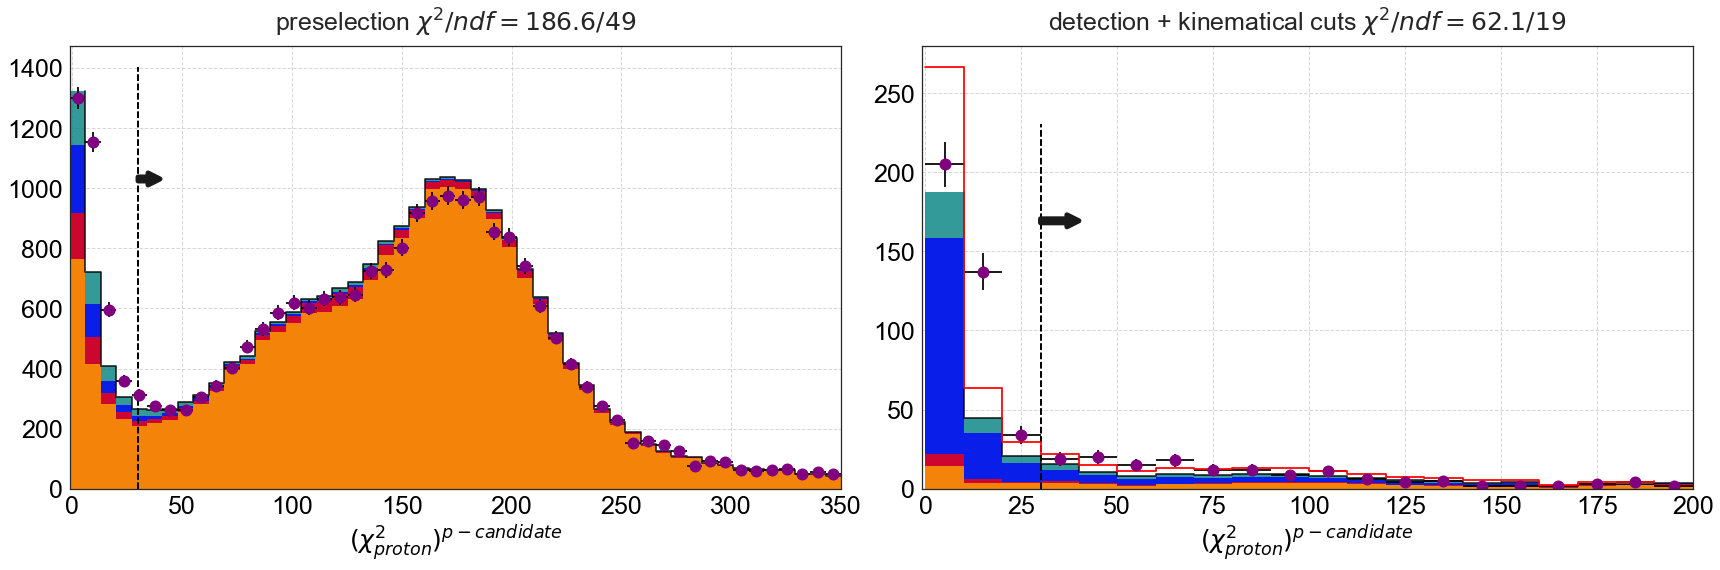

In [30]:
var='pidcali_Chi2ProtonYplane_pCandidate'
_,_,chi2,ndf=plot_before_after_cuts(var=var
                       ,x_label=r'$(\chi^2_{proton})^{p-candidate}$',y_label=''
                       ,bins_before_cuts=linspace(-1,350,51)
                       ,last_cut_name='Pt & delta phi'
                       ,bins_after_cuts=linspace(0,200,21)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                       ,xlim_before_cuts=(-1,350)
                       ,xlim_after_cuts=(-1,200)
                       ,chi2_xrange=(-1,350),debug=2,x_varcut=(30,30),dx=10
                                    ,do_area_normalized_after_cuts=True
                   );
plt.savefig(figures_path+'Chi2Proton_pCandidate_before_after_cuts.pdf')
df_chi2_ndf = df_chi2_ndf.append(pd.DataFrame({'var':var,'$\chi^2$':chi2,'ndf':ndf}
                                              ,index=['\ChiSqrP\ for the proton candidate']))

## collinearity

In [31]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 24323 ,sum of h_stack: 24323.0
detection + kinematical cuts : sum of h_OnBeam: 389 ,sum of h_stack: 277.487328224


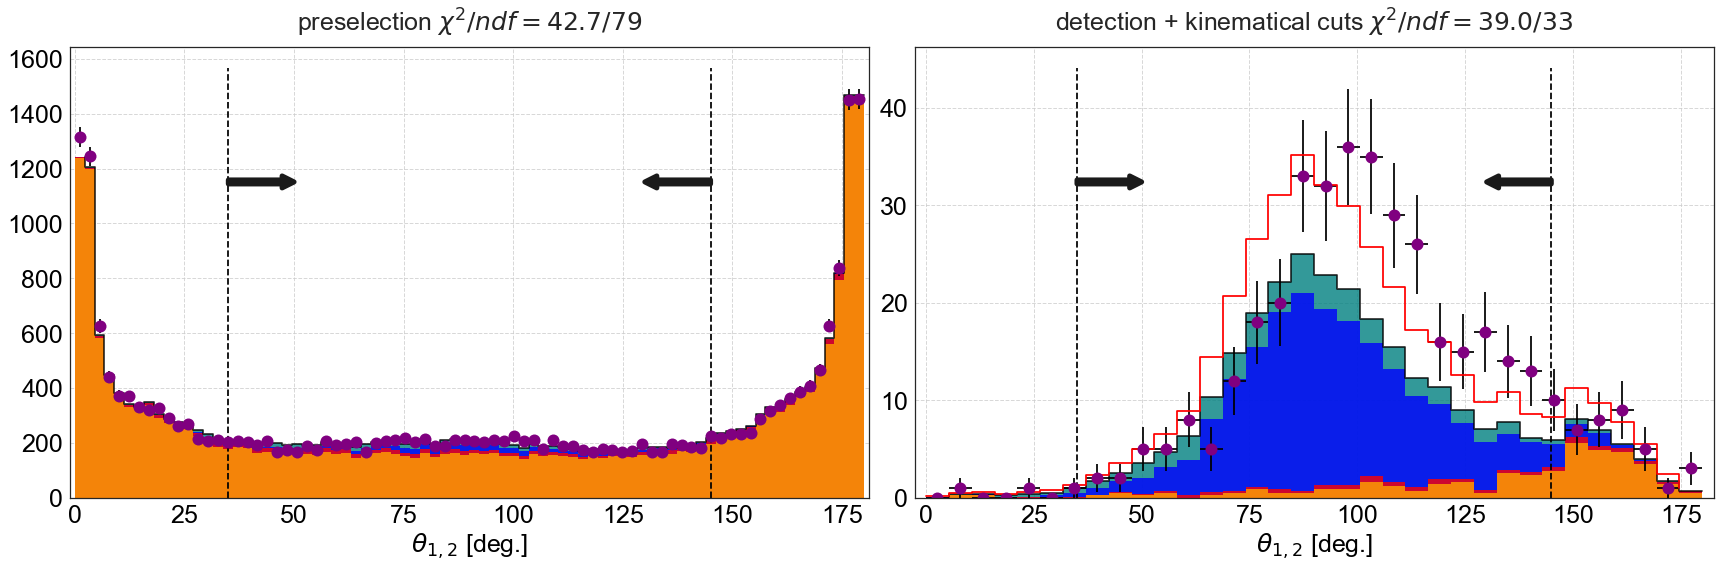

In [32]:
var='theta_12'
_,_,chi2,ndf=plot_before_after_cuts(var=var,x_label= r'$\theta_{1,2}$ [deg.]',y_label=''
                       ,bins_before_cuts=linspace(0,180,81)
                       ,last_cut_name='Pt & delta phi'
                       ,bins_after_cuts=linspace(0,180,35)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                       ,chi2_xrange=(0,180),debug=2,x_varcut=(35,145),dx=15
                   );
plt.savefig(figures_path+'theta_12_before_after_cuts.pdf')
df_chi2_ndf = df_chi2_ndf.append(pd.DataFrame({'var':var,'$\chi^2$':chi2,'ndf':ndf}
                                              ,index=['$\\theta_{1,2}$']))

## PMT information

In [33]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


saved  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/MatchedFlash_TotalPE_before_after_cuts.pdf
saved  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/MatchedFlash_TotalPE_log_before_after_cuts.pdf
saved  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/MatchedFlash_YZdistance_before_after_cuts.pdf


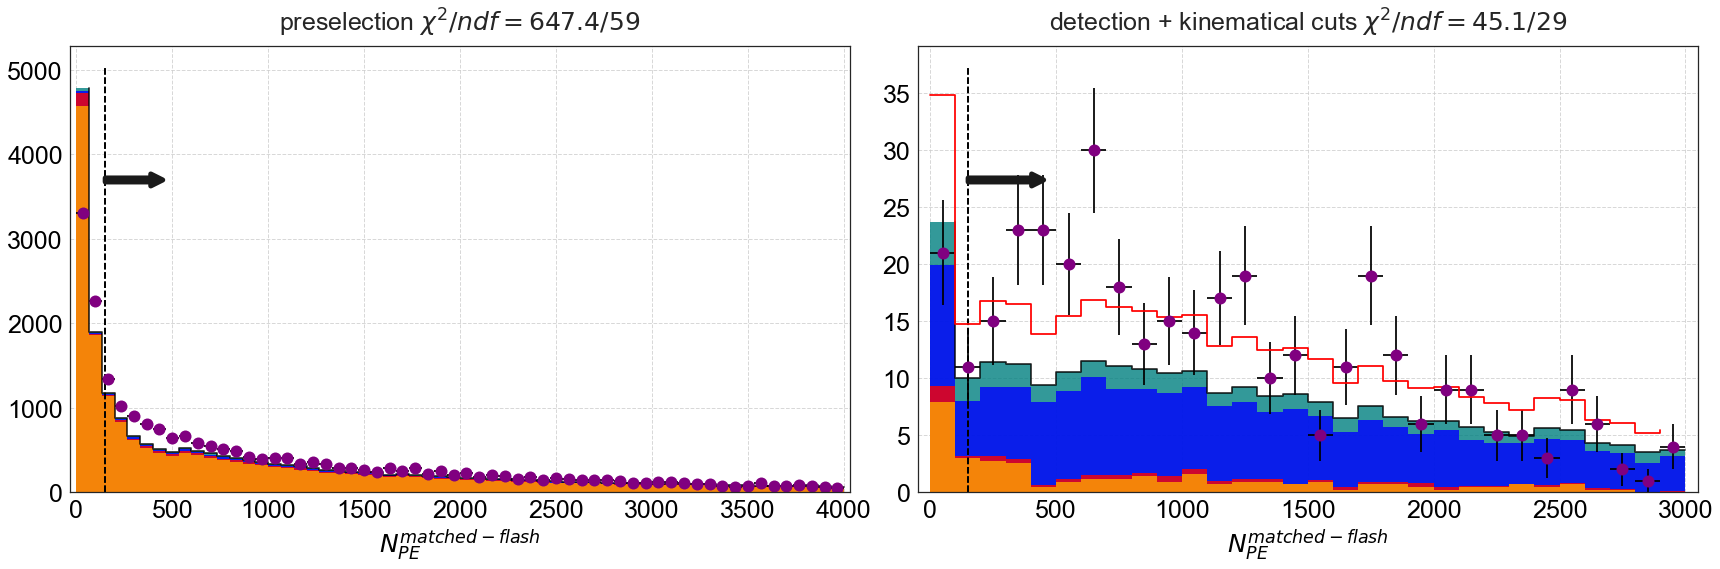

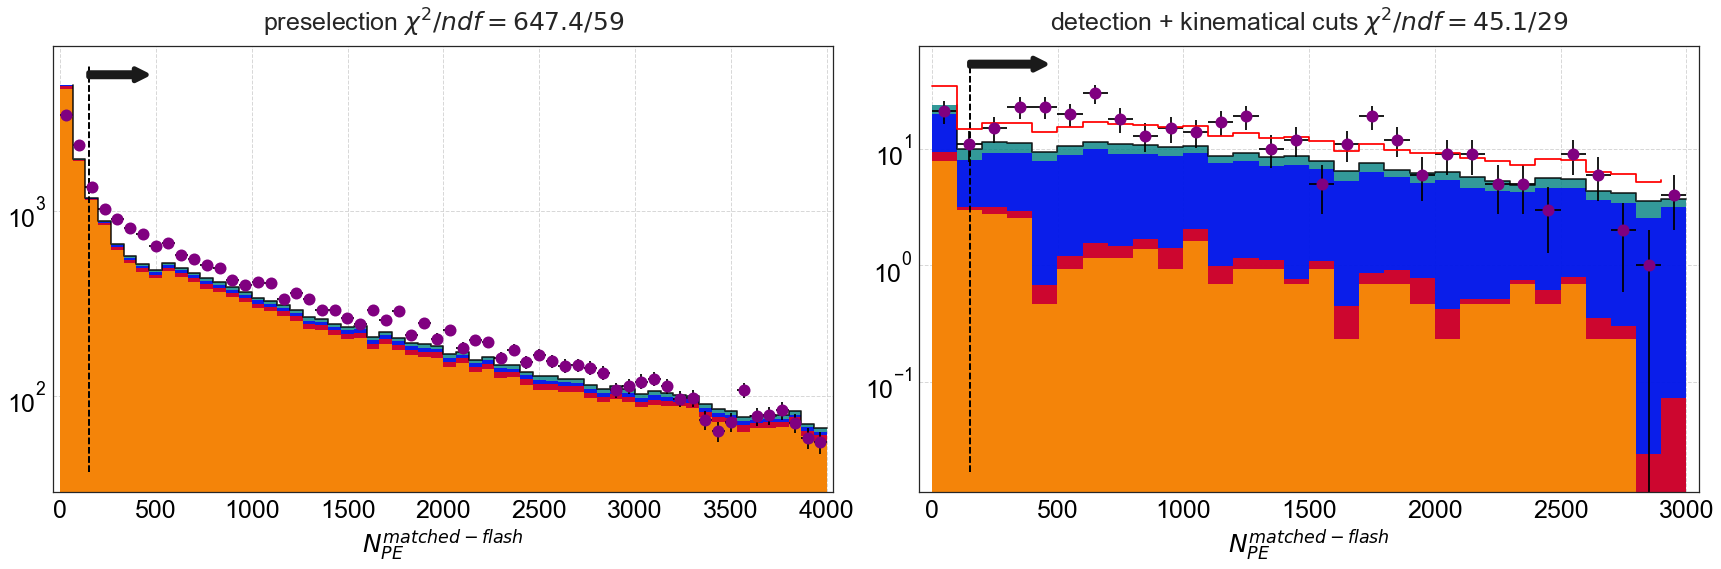

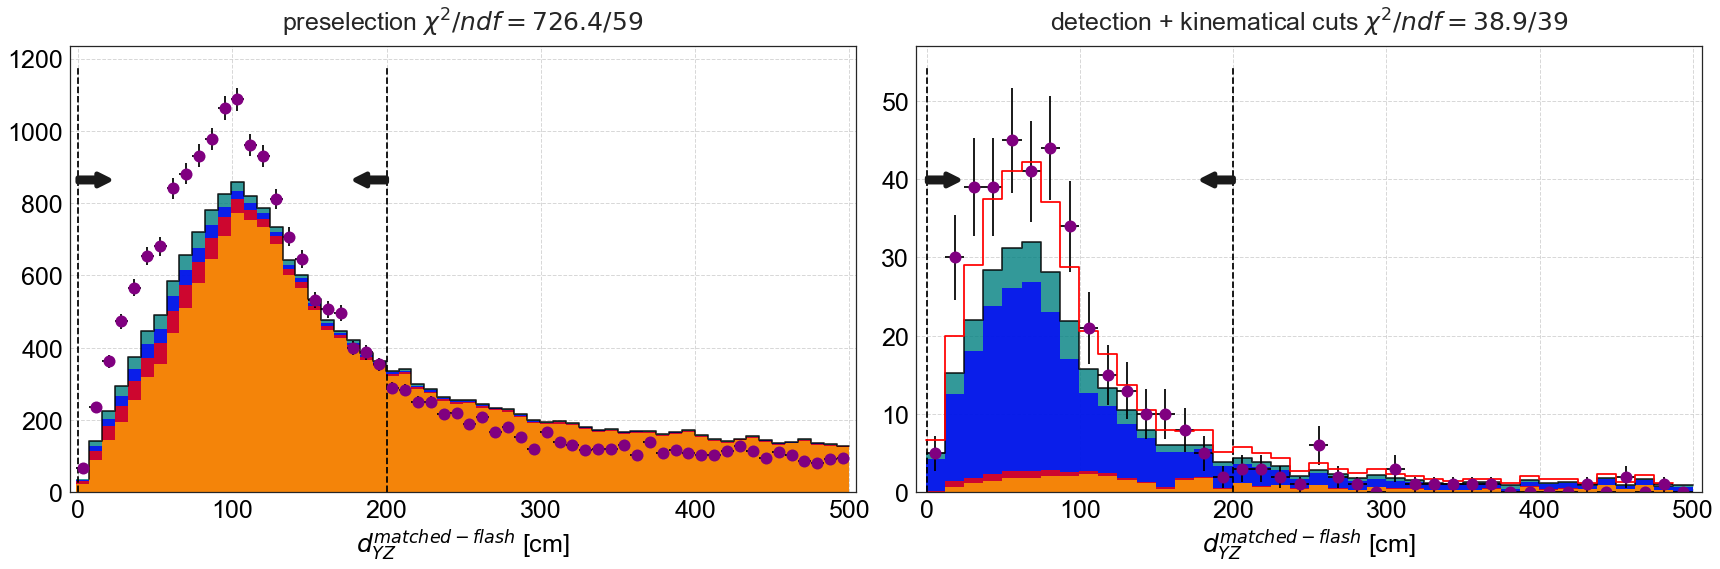

In [34]:
for ivar,(var,xlabel,bins_before_cuts
          ,bins_after_cuts,chi2_xrange
          ,x_varcut,dx
          ,vname) in enumerate(zip(['TotalPE','TotalPE','YZdistance']                                                                            
                                            ,[r'$N_{PE}^{matched-flash}$',r'$N_{PE}^{matched-flash}$',r'$d_{YZ}^{matched-flash}$ [cm]']                                            
                                            ,[linspace(-1,4000,61),linspace(-1,4000,61),linspace(-1,500,61)]                                            
                                            ,[linspace(-1,3000,31),linspace(-1,3000,31),linspace(-1,500,41)]                                            
                                            ,[(0,4000),(0,4000),(0,400)]                                            
                                            ,[(150,150),(150,150),(0,200)],[300,300,20]                                           
                                            ,['$N_{PE}$ in the associated PMT flash','$N_{PE}$ in the associated PMT flash','$d_{y-z}$ to the associated PMT flash '])):
    var = 'MatchedFlash_' + var
    _,_,chi2,ndf=plot_before_after_cuts(var=var,x_label=xlabel,y_label=''
                           ,bins_before_cuts=bins_before_cuts
                           ,last_cut_name='Pt & delta phi'
                           ,bins_after_cuts=bins_after_cuts
                           ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                           ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                           ,chi2_xrange=chi2_xrange,debug=0,x_varcut=x_varcut
                           ,dx=dx
                           ,yscale='log' if ivar==1 else 'linear'
                       );
    filename=figures_path + var + '_log_before_after_cuts.pdf' if ivar==1 else figures_path + var + '_before_after_cuts.pdf'
    plt.savefig(filename)    
    print 'saved ',filename
    if ivar==1: df_chi2_ndf = df_chi2_ndf.append(pd.DataFrame({'var':var,'$\chi^2$':chi2,'ndf':ndf}                
                                                              ,index=[vname]))

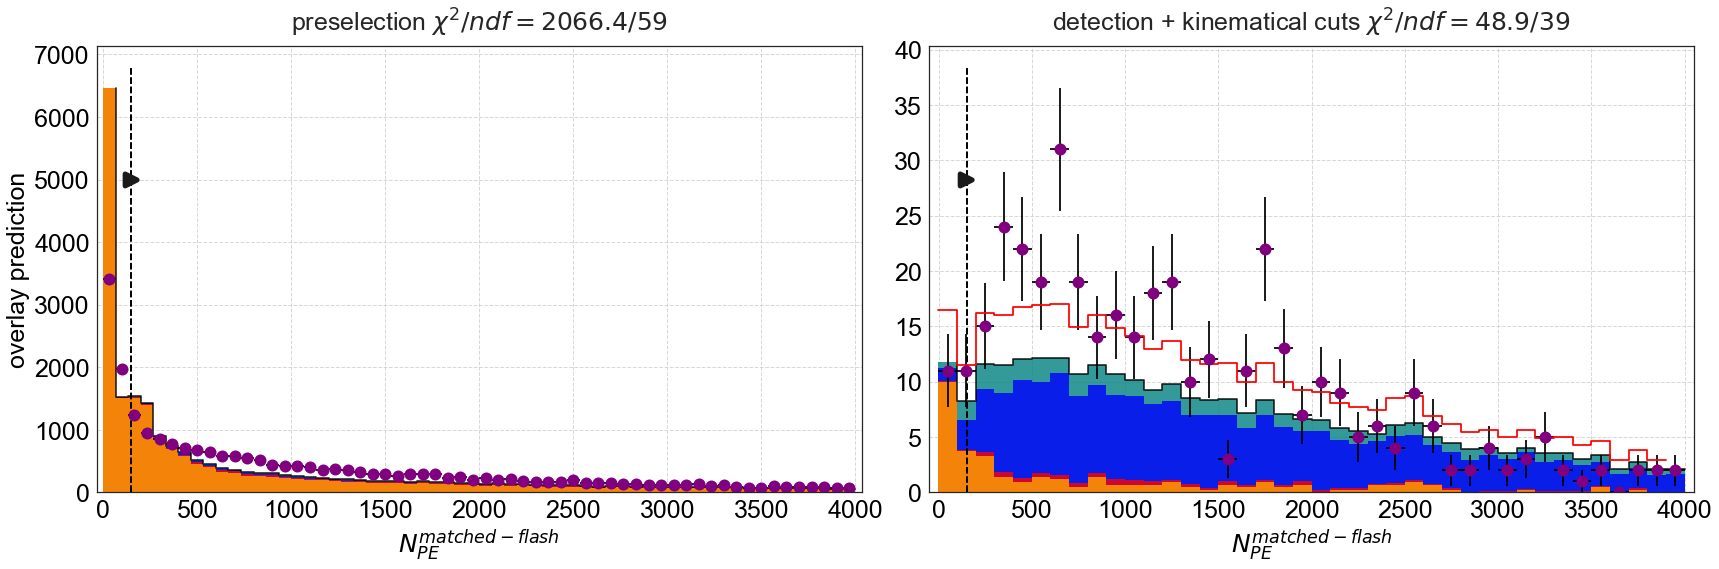

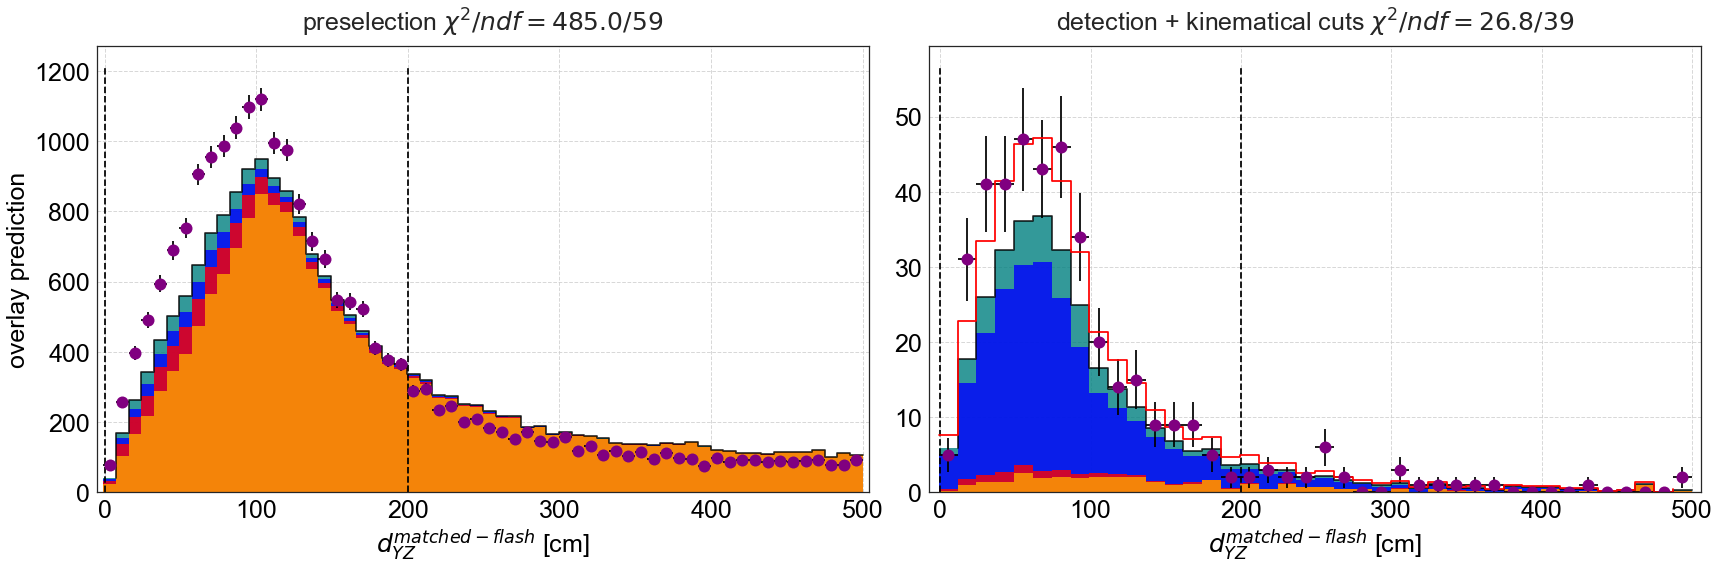

In [35]:
for var,xlabel,bins_before_cuts,bins_after_cuts,chi2_xrange,x_varcut in zip(['TotalPE','YZdistance']
                                                                            ,[r'$N_{PE}^{matched-flash}$',r'$d_{YZ}^{matched-flash}$ [cm]']
                                                                            ,[linspace(-1,4000,61),linspace(-1,500,61)]
                                                                            ,[linspace(-1,4000,41),linspace(-1,500,41)]
                                                                            ,[(0,4000),(0,400)]
                                                                            ,[(150,150),(0,200)]):
    var = 'ClosestFlash_' + var
    _,_,chi2,ndf=plot_before_after_cuts(var=var,x_label=xlabel
                           ,bins_before_cuts=bins_before_cuts
                           ,last_cut_name='Pt & delta phi'
                           ,bins_after_cuts=bins_after_cuts
                           ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                           ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                           ,chi2_xrange=chi2_xrange,debug=0,x_varcut=x_varcut
                       );

## length ($l_\mu - l_p$)

In [36]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


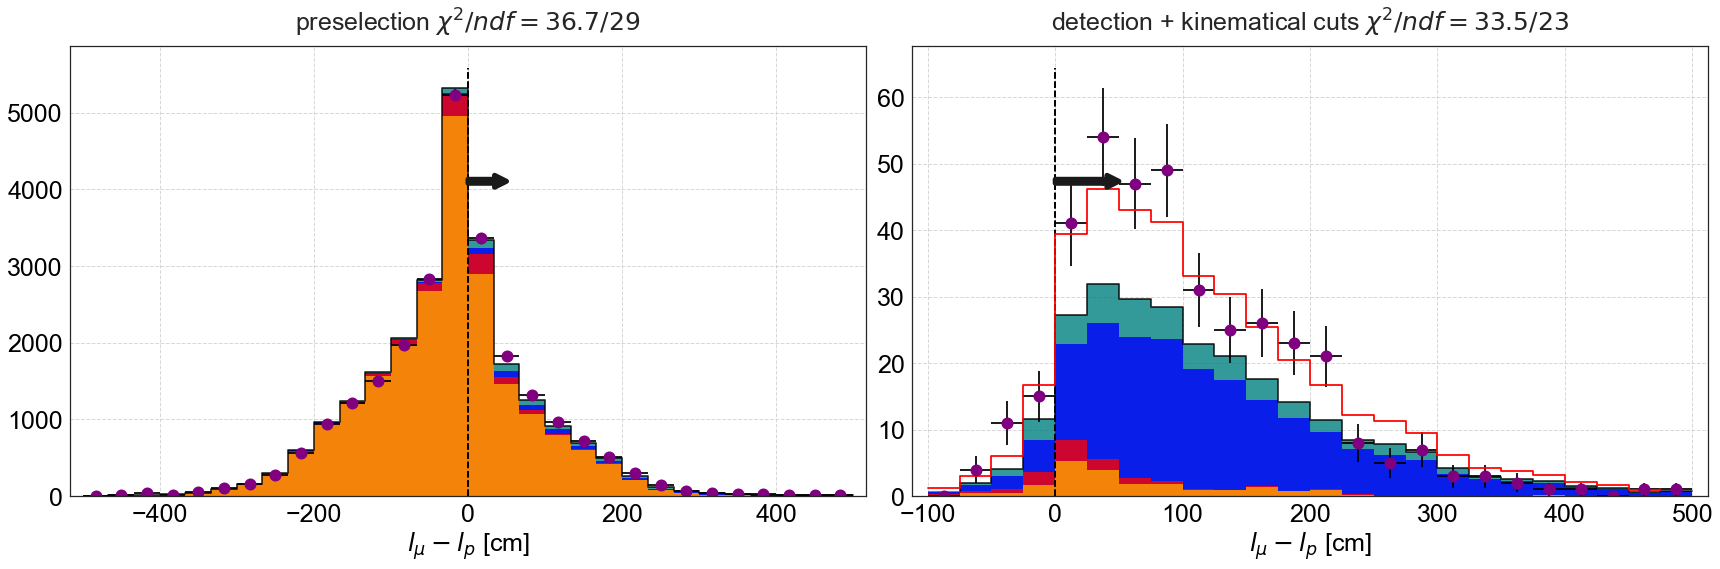

In [37]:
var='l_mu-l_p'
_,_,chi2,ndf=plot_before_after_cuts(var=var,x_label= r'$l_{\mu}-l_p$ [cm]',y_label=''
                       ,bins_before_cuts=linspace(-500,500,31)
                       ,last_cut_name='Pt & delta phi'
                       ,bins_after_cuts=linspace(-100,500,25)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                       ,chi2_xrange=(-100,500),debug=0,x_varcut=(0,0),dx=50
                   );
plt.savefig(figures_path+'length_before_after_cuts.pdf')
df_chi2_ndf = df_chi2_ndf.append(pd.DataFrame({'var':var,'$\chi^2$':chi2,'ndf':ndf}
                                              ,index=['$l_{\mu-candidate} - l_{p-candidate}$']))

## vertex activity

In [38]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/RdQ_plane_0_before_after_cuts.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/RdQ_plane_1_before_after_cuts.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_rescaled_vs_BeamOn/RdQ_plane_2_before_after_cuts.pdf


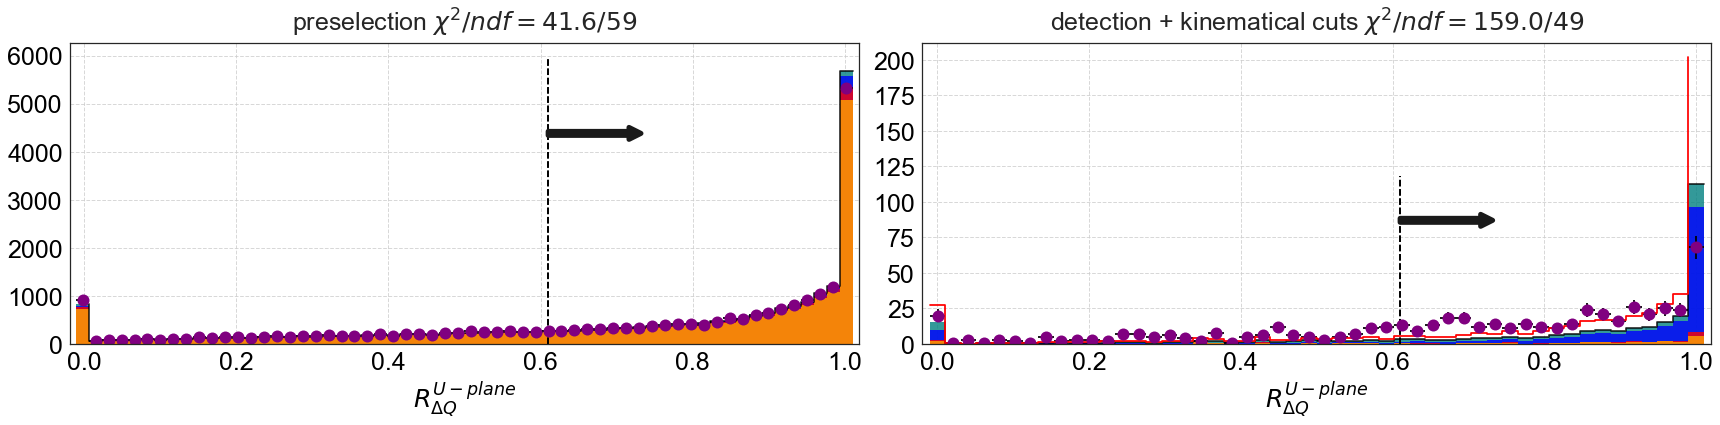

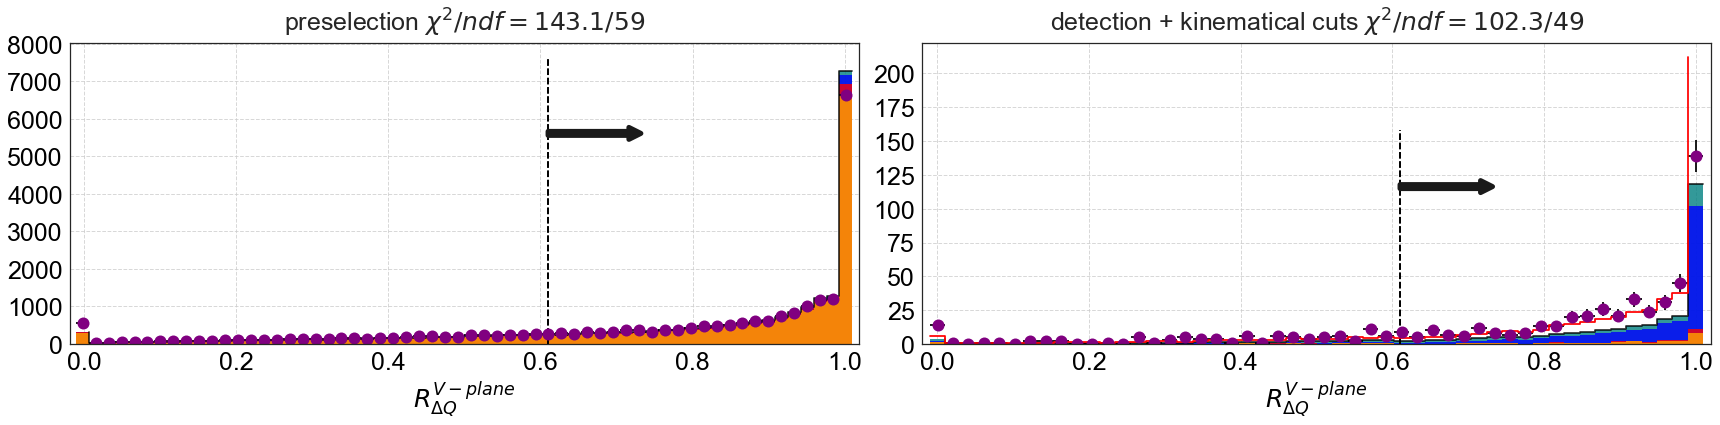

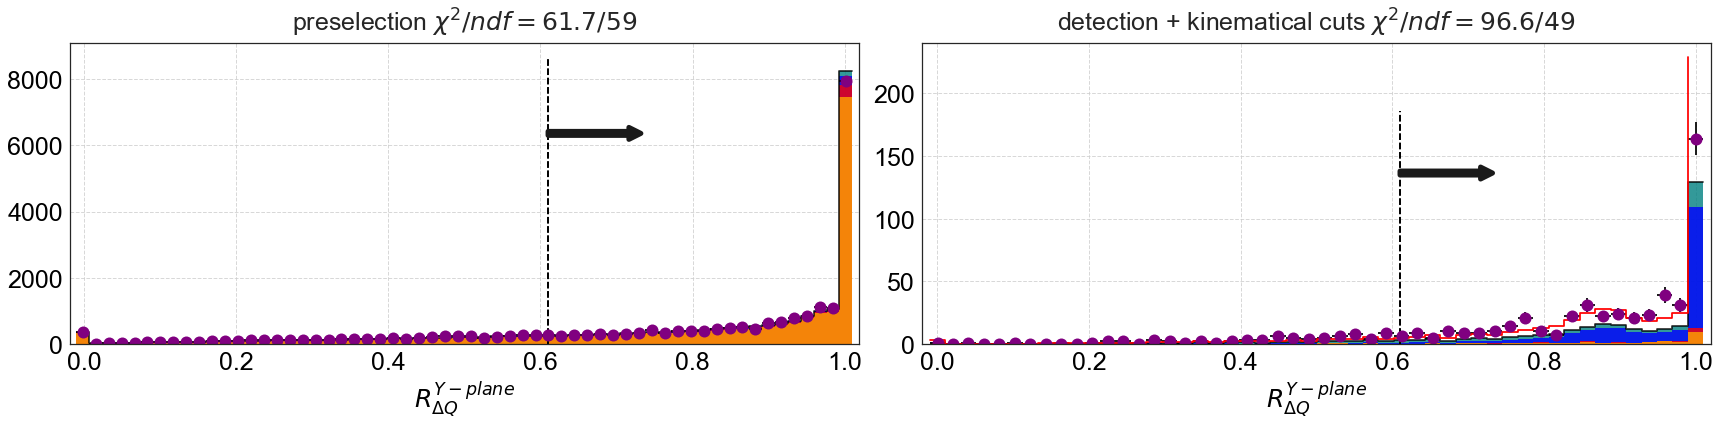

In [39]:
for plane,pname in zip([0,1,2],['U','V','Y']):
    var='RdQaroundVertex[plane %d'%plane+'][50 wires x 100 ticks]'
    _,_,chi2,ndf=plot_before_after_cuts(var=var,figsize=(24,6)
                           ,x_label=  r'$R_{\Delta Q}^{'+pname+'-plane}$',y_label=''
                           ,bins_before_cuts=linspace(-0.01,1.01,61)
                           ,bins_after_cuts=linspace(-0.01,1.01,51)
                           ,x_varcut=(0.61,0.61)
                           ,last_cut_name='Pt & delta phi'
                           ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                           ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                           ,chi2_xrange=(0,1)
                   )
    plt.savefig(figures_path+'RdQ_plane_%d'%plane+'_before_after_cuts.pdf')
    print 'saved',figures_path+'RdQ_plane_%d'%plane+'_before_after_cuts.pdf'
    df_chi2_ndf = df_chi2_ndf.append(pd.DataFrame({'var':var,'$\chi^2$':chi2,'ndf':ndf}
                                                  ,index=['\RdQ\ in the '+pname+'-plane']))

## $\Delta \phi$

In [40]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
            ,'Pt no delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 24323 ,sum of h_stack: 24323.0
detection + kinematical cuts : sum of h_OnBeam: 693 ,sum of h_stack: 342.559100865


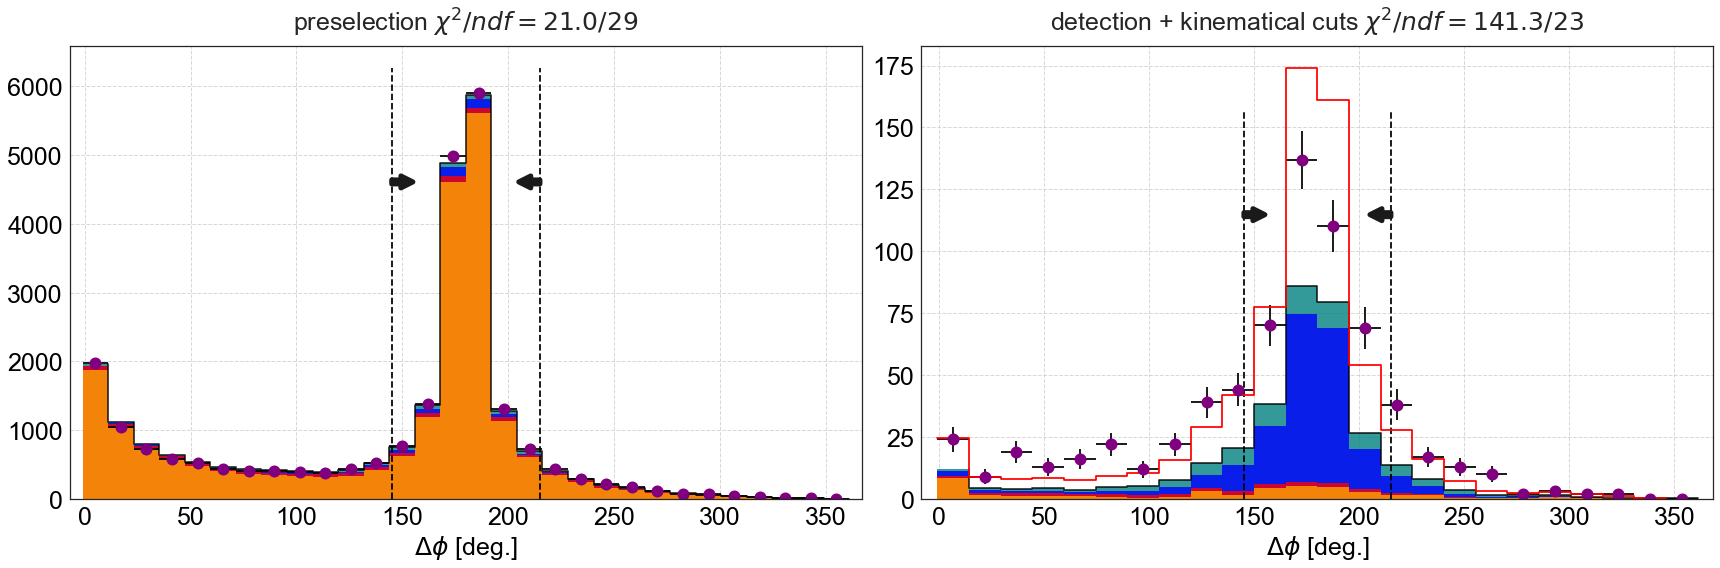

In [41]:
var='delta_phi'
_,_,chi2,ndf=plot_before_after_cuts(var=var,x_label= r'$\Delta \phi$ [deg.]',y_label=''
                       ,bins_before_cuts=linspace(-1,361,31)
                       ,last_cut_name='Pt no delta phi'
                       ,bins_after_cuts=linspace(-1,361,25)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                       ,chi2_xrange=(-1,361)
                       ,x_varcut=(145,215),dx=10,debug=2
                   );
plt.savefig(figures_path+'delta_phi_before_after_cuts.pdf')
df_chi2_ndf = df_chi2_ndf.append(pd.DataFrame({'var':var,'$\chi^2$':chi2,'ndf':ndf}
                                              ,index=['$\Delta \phi$']))

## $p_t$

In [42]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 24321 ,sum of h_stack: 24317.3568135
detection + kinematical cuts : sum of h_OnBeam: 417 ,sum of h_stack: 285.08238568


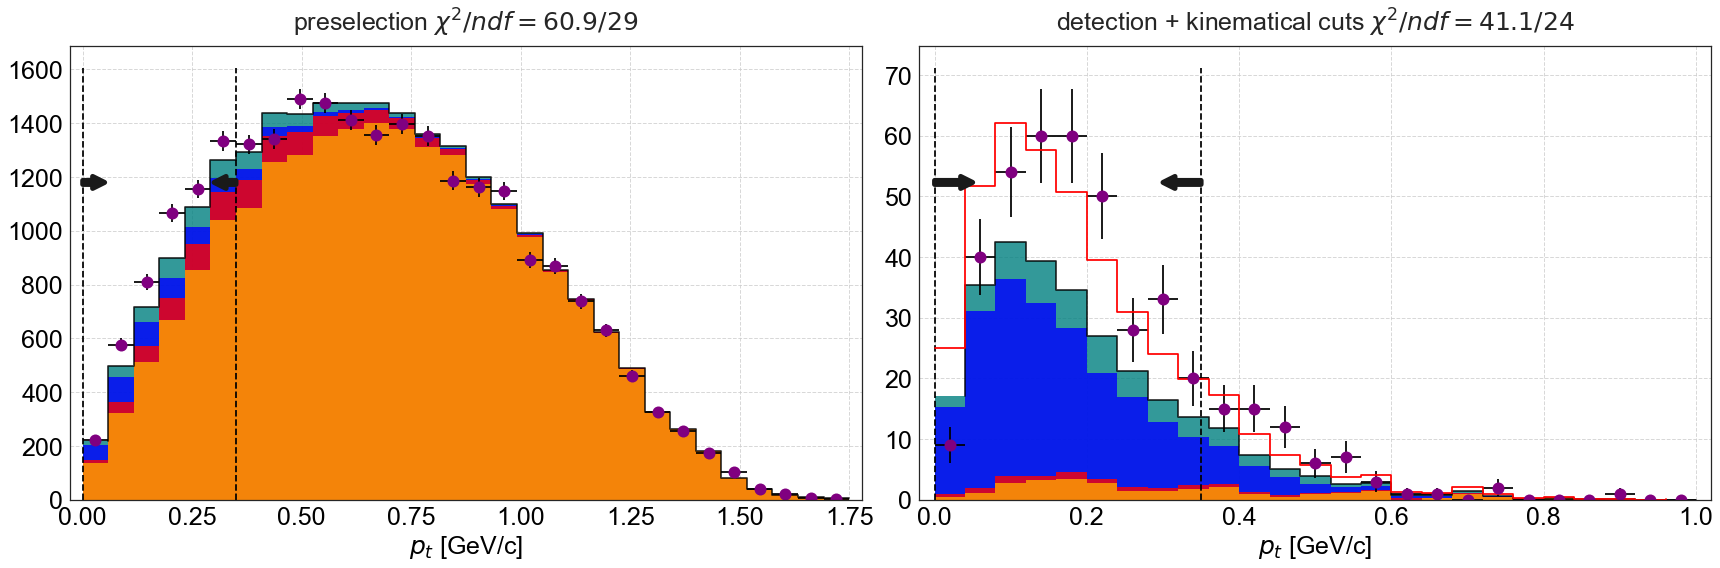

In [43]:
var='reco_Pt'
_,_,chi2,ndf=plot_before_after_cuts(var=var,x_label=r'$p_{t}$ [GeV/c]',y_label=''
                       ,bins_before_cuts=linspace(0,1.75,31)
                       ,last_cut_name='delta phi'
                       ,bins_after_cuts=linspace(0,1.,26)
                       ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                    
                       ,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                       ,chi2_xrange=(0,1.)
                       ,x_varcut=(0,0.35),dx=0.05,debug=2
                   );
plt.savefig(figures_path+'Pt_before_after_cuts.pdf')
df_chi2_ndf = df_chi2_ndf.append(pd.DataFrame({'var':var,'$\chi^2$':chi2,'ndf':ndf}
                                              ,index=['$p_{t}$']))

# summary

In [44]:
from scipy import stats
Pval = []
for i,row in df_chi2_ndf.iterrows():
    Pval.append( 1 - stats.chi2.cdf(row[r'$\chi^2$'], row['ndf'] ) )         
df_chi2_ndf['Pval'] = Pval    

In [45]:
bad_obsevables = df_chi2_ndf[df_chi2_ndf['Pval']<0.05]
good_obsevables = df_chi2_ndf[df_chi2_ndf['Pval']>0.05]
good_obsevables

,$\chi^2$,ndf,var,Pval
"$\theta_{1,2}$",39.013404,33,theta_12,0.217552
$l_{\mu-candidate} - l_{p-candidate}$,33.510771,23,l_mu-l_p,0.072571


In [46]:
print "plug in table tab:summary_observables in tab:OverlayRescaledVsBeamOn.tex"
print 
print 
print "\hline \hline"
for i,row in df_chi2_ndf[:].iterrows(): 
    print "			"+i+"  & %.1f"%row[r'$\chi^2$']+"/%.1f"%row['ndf']+"  & %.4f"%row['Pval'] + "\\tabularnewline"
    print "\hline"        
print
print

plug in table tab:summary_observables in tab:OverlayRescaledVsBeamOn.tex


\hline \hline
			\ChiSqrP\ for the muon candidate  & 69.5/43.0  & 0.0064\tabularnewline
\hline
			\ChiSqrP\ for the proton candidate  & 62.1/19.0  & 0.0000\tabularnewline
\hline
			$\theta_{1,2}$  & 39.0/33.0  & 0.2176\tabularnewline
\hline
			$N_{PE}$ in the associated PMT flash  & 45.1/29.0  & 0.0287\tabularnewline
\hline
			$l_{\mu-candidate} - l_{p-candidate}$  & 33.5/23.0  & 0.0726\tabularnewline
\hline
			\RdQ\ in the U-plane  & 159.0/49.0  & 0.0000\tabularnewline
\hline
			\RdQ\ in the V-plane  & 102.3/49.0  & 0.0000\tabularnewline
\hline
			\RdQ\ in the Y-plane  & 96.6/49.0  & 0.0001\tabularnewline
\hline
			$\Delta \phi$  & 141.3/23.0  & 0.0000\tabularnewline
\hline
			$p_{t}$  & 41.1/24.0  & 0.0161\tabularnewline
\hline


